- [Rossi](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html)
- [scikit-survival](https://scikit-survival.readthedocs.io/en/stable/)
- https://www.kaggle.com/code/gunesevitan/survival-analysis
- https://www.kaggle.com/code/sonalisingh1411/statistical-analysis-eda-survival-prediction
- https://www.kaggle.com/code/brianfitzgibbon0/kaplan-meier-eda-modelling-no-leakage-f1-84
- https://www.kaggle.com/code/sryo188558/cox-proportional-hazard-model
- https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation
- https://scikit-learn.org/stable/user_guide.html

The following code loads the Rossi dataset from a CSV file, converts the 'arrest' column to a boolean type, creates a survival object using the 'time' and 'event' columns, and fits a Cox proportional hazards model using the 'age', 'race', 'wexp', 'mar', 'paro', and 'prio' columns as predictors. The 'robust' parameter is set to True to compute robust standard errors. The model summary is printed, and the hazard ratios with their confidence intervals are computed and displayed.

In [11]:
%matplotlib inline

# Load the necessary libraries
import pretty_errors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

In [12]:
# Load the Rossi dataset
rossi = load_rossi()

In [13]:
rossi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   week    432 non-null    int64
 1   arrest  432 non-null    int64
 2   fin     432 non-null    int64
 3   age     432 non-null    int64
 4   race    432 non-null    int64
 5   wexp    432 non-null    int64
 6   mar     432 non-null    int64
 7   paro    432 non-null    int64
 8   prio    432 non-null    int64
dtypes: int64(9)
memory usage: 30.5 KB


In [14]:
# Fit a Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')
# cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")

# Compute the hazard ratios and their confidence intervals
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-03-12 00:53:28 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

<AxesSubplot:xlabel='log(HR) (95% CI)'>

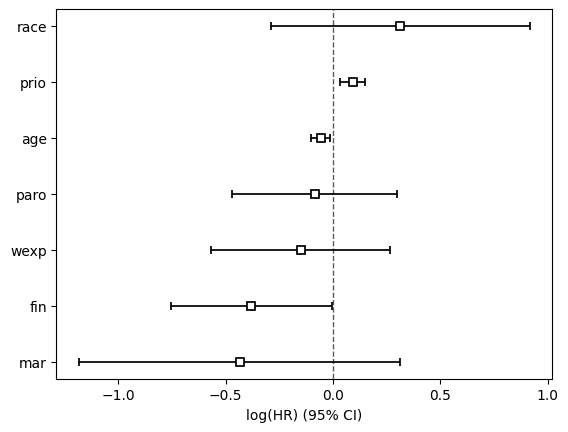

In [15]:
cph.plot()

<AxesSubplot:>

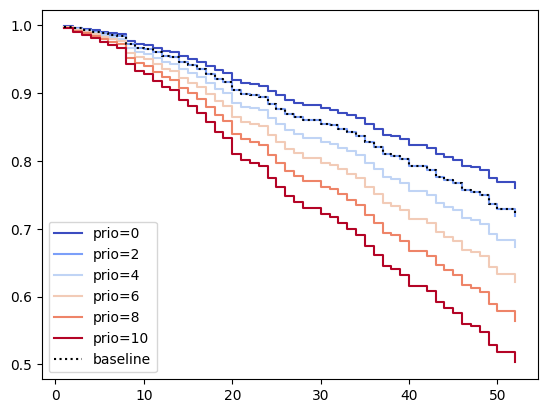

In [16]:
cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm')

In [17]:
X = rossi

cph.predict_survival_function(X)
cph.predict_median(X)
cph.predict_partial_hazard(X)

0      1.219126
1      3.230250
2      3.031058
3      0.487712
4      1.214025
         ...   
427    0.416973
428    1.517713
429    0.579426
430    0.935629
431    0.710516
Length: 432, dtype: float64

In [18]:
# variable `fin` is the treatment of interest so don't penalize it at all
penalty = np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

cph_sparse = CoxPHFitter(penalizer=penalty) # sparse solutions,
cph_sparse.fit(rossi, 'week', 'arrest')
cph_sparse.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
                penalizer = [0.  0.5 0.5 0.5 0.5 0.5 0.5]
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -667.42
         time fit was run = 2023-03-12 00:53:29 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.69       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.02       0.98       0.01            -0.03             0.00                 0.97                 1.00
race        0.09       1.10       0.17            -0.23             0.42                 0.79                 1.53
wexp       -0.15       0.86       0.11            -0.37             0.07                 0.69                 1.07
mar        -0.17       0.84       0.17            -0.51             0.17                 0.60                 1.18
paro       -0.04       0.96       0.11            -0.26             0.19                 0.77                 1.20
prio        0.04       1.04       0.02             0.00             0.07                 1.00                 1.08

            cmp to     z    p   -log2(p)
covariate                               
fin           0.00 -1.97 0.05       4.37
age           0.00 -1.75 0.08       3.64
race          0.00  0.56 0.57       0.80
wexp          0.00 -1.34 0.18       2.47
mar           0.00 -0.98 0.33       1.61
paro          0.00 -0.32 0.75       0.42
prio          0.00  2.00 0.05       4.45
---
Concordance = 0.63
Partial AIC = 1348.85
log-likelihood ratio test = 15.91 on 7 df
-log2(p) of ll-ratio test = 5.27

<AxesSubplot:xlabel='log(HR) (95% CI)'>

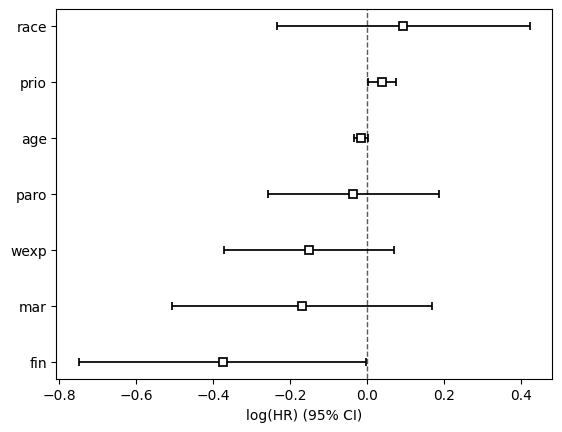

In [19]:
cph_sparse.plot()

Text(0.5, 0, 'time $t$')

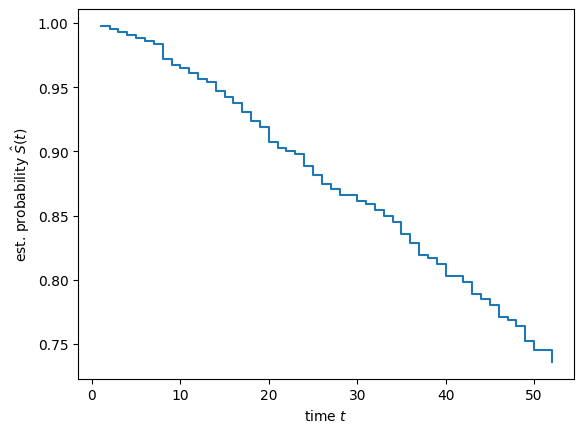

In [24]:
from sksurv.nonparametric import kaplan_meier_estimator

# Make arrest a boolean
rossi['arrest'] = rossi['arrest'].astype(bool)
time, survival_prob = kaplan_meier_estimator(rossi['arrest'], rossi['week'])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability $\hat{S}(t)$")
plt.xlabel("time $t$")

In [21]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

pandas==1.5.3
lifelines==0.27.4
matplotlib==3.4.3
numpy==1.24.2
